Text(0.5, 1.0, 'Comparison with space paritioning methods on SIFT1M')

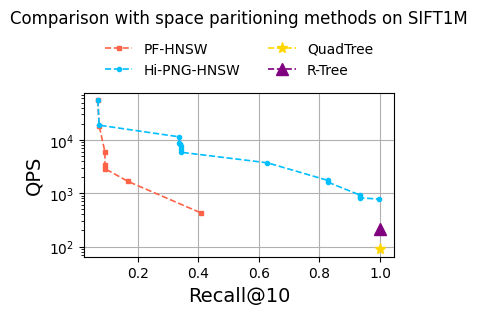

In [1]:
from function import pareto_frontier
import json, os
import matplotlib.pyplot as plt
import numpy as np

perf_output = "perf/sp"

dataset = 'sift-128-euclidean'

perf1 = json.load(open(os.path.join(perf_output, f"{dataset}.HNSW.json")))
perf2 = json.load(open(os.path.join(perf_output, f"{dataset}.Hi-PNG-HNSW.json")))
perf3 = json.load(open(os.path.join(perf_output, f"{dataset}.QuadTree.json")))
perf4 = json.load(open(os.path.join(perf_output, f"{dataset}.RTree.json")))
perf1 = pareto_frontier(perf1, 0)
perf2 = pareto_frontier(perf2, 0)
perf3 = pareto_frontier(perf3, 0)
perf4 = pareto_frontier(perf4, 0)
recall1 = [item["recall"] for item in perf1] 
recall2 = [item["recall"] for item in perf2]
recall3 = [item["recall"] for item in perf3]
recall4 = [item["recall"] for item in perf4]
qps1 = [item["qps"] for item in perf1]
qps2 = [item["qps"] for item in perf2]
qps3 = [item["qps"] for item in perf3]
qps4 = [item["qps"] for item in perf4]
# Plot
plt.figure(figsize=(4, 3))
plt.plot(recall1, qps1, marker='s', color='tomato', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall2, qps2, marker='o', color='deepskyblue', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall3, qps3, marker='*', color='gold', linewidth=1.2, linestyle='dashed', markersize=8)
plt.plot(recall4, qps4, marker='^', color='purple', linewidth=1.2, linestyle='dashed', markersize=8)
plt.yscale('log')
plt.xlabel('Recall@10', fontsize=14)
plt.ylabel('QPS', fontsize=14) 
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)
plt.title("RF-ANNS performance comparison on SIFT1M", loc='center', pad=20)
plt.legend(["PF-HNSW", "Hi-PNG-HNSW", "QuadTree", "R-Tree"],
           frameon=False,
           bbox_to_anchor=(0.5, 1.02),
           loc='lower center',
           ncol=2)
plt.tight_layout()
plt.title("Comparison with space paritioning methods on SIFT1M", loc='center', pad=50)


In [2]:
from scipy.interpolate import interp1d

# Create interpolation functions for each method
f1 = interp1d(recall1, qps1, bounds_error=False, fill_value="extrapolate")
f2 = interp1d(recall2, qps2, bounds_error=False, fill_value="extrapolate")
f3 = interp1d(recall3, qps3, bounds_error=False, fill_value="extrapolate")
f4 = interp1d(recall4, qps4, bounds_error=False, fill_value="extrapolate")

# Target recall values
target_recalls = [0.2, 0.4, 0.6, 0.8, 1.0]

# Calculate interpolated QPS values
qps1_interp = f1(target_recalls)
qps2_interp = f2(target_recalls)
qps3_interp = f3(target_recalls)
qps4_interp = f4(target_recalls)

# Create and display markdown table
print("| Recall | Post-Filtering-HNSW | Hi-PNG-HNSW | QuadTree | R-Tree |")
print("|--------|-------------------------|-----------------|-----------------|---------|")
for i, recall in enumerate(target_recalls):
    print(f"| {recall:.1f} | {qps1_interp[i]:.2f} | {qps2_interp[i]:.2f} | {qps3_interp[i]:.2f} | {qps4_interp[i]:.2f} |")

| Recall | Post-Filtering-HNSW | Hi-PNG-HNSW | QuadTree | R-Tree |
|--------|-------------------------|-----------------|-----------------|---------|
| 0.2 | 1492.45 | 15242.30 | nan | nan |
| 0.4 | 465.14 | 5426.44 | nan | nan |
| 0.6 | -562.16 | 3925.75 | nan | nan |
| 0.8 | -1589.47 | 2011.35 | nan | nan |
| 1.0 | -2616.78 | 774.11 | nan | nan |


/home/ym/anaconda3/envs/Hi-PNG/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
